In [1]:
## import the Required Librarys

In [2]:
import pandas as pd

In [3]:
## import the dataset and assigning to the variable data

In [4]:
data=pd.read_csv(r"C:\Users\MOHAMMED RAYAZ\Downloads\dataframe_.csv")
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [ ]:
##shape of the dataset

In [5]:
data.shape

(1697, 2)

In [ ]:
## info of the data

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [ ]:
## isnull values

In [7]:
data.isnull().sum()

input     1
output    1
dtype: int64

In [8]:
## The shape of the given dataset is 1697 rows and 2 columns,we are having 1 nan in each

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Distplot

<AxesSubplot:ylabel='Density'>

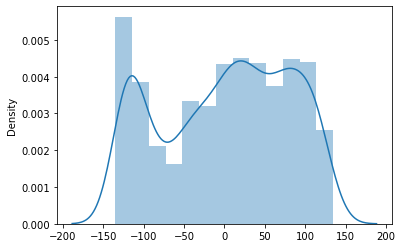

In [10]:
sns.distplot(data[['input']])

In [ ]:
## plotting the distplot

<AxesSubplot:ylabel='Density'>

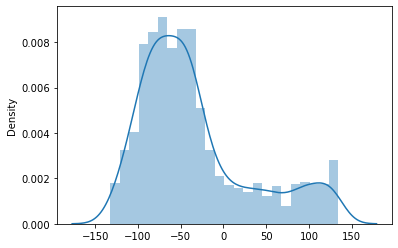

In [11]:
sns.distplot(data[['output']])

In [12]:
## Both the colmns are following the appropiet Normal distribtion.

<AxesSubplot:xlabel='input'>

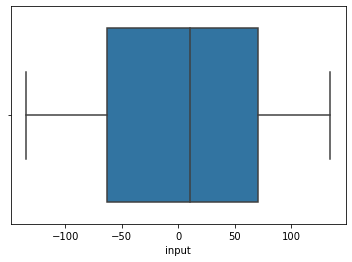

In [13]:
sns.boxplot(data['input'])

<AxesSubplot:xlabel='input'>

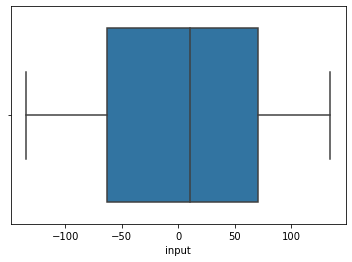

In [14]:
sns.boxplot(data['input'])

In [15]:
## using box plot we can say that, there no outliers in the dataset

In [16]:
data.dropna(inplace=True)

In [17]:
## As the data is haveing 2 nan values and if we remove them that will not effect the columns 

In [18]:
## Info after droping the data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 39.8 KB


In [20]:
## Since the data is regression  we use regeression algorithom

In [ ]:
##importing the libraries

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
## creating class variable and feature variable

In [22]:
cl=data[['input']]
fv=data[['output']]

In [ ]:
##splitting the data into xtrains and ytrains

In [23]:
x_train,x_test,y_train,y_test=train_test_split(cl,fv,train_size=0.8)

In [ ]:
## now we will perform standardisation

In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [ ]:
## we're using linear regression

In [26]:
lr=LinearRegression()

In [27]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
model=lr.fit(transfromed_train,y_train)

In [29]:
predi=model.predict(transfromed_test)

In [30]:
## now we will perform Performance metrics like meansquare error and absolute error

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## 1 mean square error

In [32]:
mean_squared_error(y_test,predi)

3223.0443226154302

In [ ]:
## 2 mean square error

In [33]:
mean_absolute_error(y_test,predi)

41.69557186260281

In [ ]:
## r2 score

In [34]:
r2_score(y_test,predi)

0.297012003468739

In [35]:
model.coef_

array([[32.69950894]])

In [36]:
model.intercept_

array([-34.97916007])

In [37]:
model.predict(fv).reshape(len(model.predict(fv)))

array([-4304.62220784, -4283.91832736, -4290.55316237, ...,
       -2879.8364379 , -3466.56544027, -3361.39864319])

In [38]:
## Feature engineering - square

In [39]:
data['inputsquare']=data['input']**2
data

,input,output,inputsquare
0,-122.740667,-130.572085,15065.271434
1,-121.531419,-129.938929,14769.885901
2,-134.917019,-130.141832,18202.602016
3,-120.605951,-125.760932,14545.795441
4,-129.894781,-112.785214,16872.654053
...,...,...,...
1692,25.410184,-76.380902,645.677427
1693,29.537304,-82.796934,872.452325
1694,31.633331,-87.000000,1000.667649
1695,29.091458,-104.943052,846.312913


In [40]:
fv=data[['input','inputsquare']]
cl=data[['output']]
x_train,x_test,y_train,y_test=train_test_split(cl,fv,train_size=0.8)

In [41]:
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)

In [42]:
model=lr.fit(transfromed_train,y_train)

In [43]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [44]:
predi=model.predict(transfromed_test)

In [45]:
mean_squared_error(y_test,predi)

12358628.627191653

In [46]:
mean_absolute_error(y_test,predi)

2003.9578936590083

In [47]:
r2_score(y_test,predi)

0.2704669125117276

In [48]:
model.coef_

array([[  39.14280669],
       [2404.0658068 ]])

In [49]:
model.intercept_

array([-5.07636008e-01,  6.29852349e+03])

In [50]:
## Now we will try with cube 

In [51]:
data['inputcube']=data['input']**3
cl=data[['input','inputcube','inputsquare']]
fv=data[['output']]
x_train,x_test,y_train,y_test=train_test_split(cl,fv,train_size=0.8)
std = StandardScaler()
transfromed_train = std.fit_transform(x_train)
transfromed_test = std.transform(x_test)
model=lr.fit(transfromed_train,y_train)
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [52]:
predi=model.predict(transfromed_test)
mean_squared_error(y_test,predi)

1362.193326307971

In [53]:
mean_absolute_error(y_test,predi)

24.620333578795414

In [54]:
r2_score(y_test,predi)

0.7009596258891596

In [55]:
## Our accuracy got increased once after we use the techniques of feature engineering 

In [56]:
#PolynomialFeatures

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly_features = PolynomialFeatures(degree=7)
new = data[["input"]]
new_poly = poly_features.fit_transform(new)

In [59]:
new_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
        -2.78575169e+10,  3.41925021e+12, -4.19681053e+14],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
        -2.65120220e+10,  3.22204366e+12, -3.91579539e+14],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
        -4.47026927e+10,  6.03115404e+12, -8.13705325e+14],
       ...,
       [ 1.00000000e+00,  3.16333313e+01,  1.00066765e+03, ...,
         3.16755853e+07,  1.00200428e+09,  3.16967335e+10],
       [ 1.00000000e+00,  2.90914577e+01,  8.46312913e+02, ...,
         2.08366270e+07,  6.06167855e+08,  1.76343065e+10],
       [ 1.00000000e+00,  1.71452960e+01,  2.93961173e+02, ...,
         1.48157940e+06,  2.54021172e+07,  4.35526818e+08]])

In [60]:
scaler = StandardScaler()
new_norm = scaler.fit_transform(new_poly)

In [61]:
new_norm

array([[ 0.        , -1.56870605,  1.57285655, ..., -1.91277026,
         1.75651878, -1.86607761],
       [ 0.        , -1.55339576,  1.52021472, ..., -1.81434765,
         1.61781846, -1.73147082],
       [ 0.        , -1.72287089,  2.13197273, ..., -3.14499062,
         3.59353629, -3.75346153],
       ...,
       [ 0.        ,  0.38582384, -0.93365249, ...,  0.12731712,
        -0.64762097,  0.14435461],
       [ 0.        ,  0.35364116, -0.96116066, ...,  0.12652425,
        -0.64789937,  0.14428725],
       [ 0.        ,  0.20239076, -1.05959746, ...,  0.12510843,
        -0.64830784,  0.14420487]])

In [62]:
y = data["output"]
x_train, x_test, y_train, y_test = train_test_split(new_norm, y, test_size=0.2)

In [63]:
model = LinearRegression().fit(x_train, y_train)

In [64]:
y_pred = model.predict(x_test)

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
y_pred = model.predict(x_test)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [68]:
mse

1237.0198674718902

In [69]:
r2

0.6985105471585215

In [70]:
## Using knn Regression

In [71]:
data=pd.read_csv(r"C:\Users\MOHAMMED RAYAZ\Downloads\dataframe_.csv")

In [72]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [73]:
fv=data[['input']]
cl=data[['output']]
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8)
x_trainf,xcv,y_trainf,ycv=train_test_split(x_train,y_train,train_size=0.8)

In [74]:
fv=data[['input']]
cl=data[['output']]
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8)
x_trainf,xcv,y_trainf,ycv=train_test_split(x_train,y_train,train_size=0.8)